100%|██████████| 49.7M/49.7M [00:01<00:00, 29.6MB/s]


YOLOv8m summary: 169 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs

image 1/1 c:\Users\Sid\Documents\computer_vision\CNN.YOLO\bus.jpg: 640x480 4 persons, 1 bus, 98.7ms
Speed: 3.9ms preprocess, 98.7ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 480)


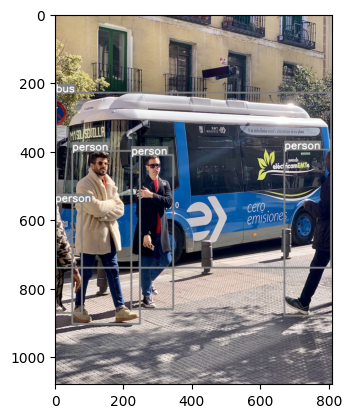

In [3]:
# testing to see if it works
from ultralytics import YOLO
model = YOLO('yolov8s.pt')
model.info()
results = model('bus.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

Data pipeline stuff

In [8]:
import os
import random
import shutil

# Define paths
images_dir = "datasets/Annotated_FruitNet/images"
labels_dir = "datasets/Annotated_FruitNet/labels"

image_train = os.path.join(images_dir, "train")
image_val = os.path.join(images_dir, "val")
image_test = os.path.join(images_dir, "test")

label_train = os.path.join(labels_dir, "train")
label_val = os.path.join(labels_dir, "val")
label_test = os.path.join(labels_dir, "test")

# Create test directories if they don't exist
os.makedirs(image_test, exist_ok=True)
os.makedirs(label_test, exist_ok=True)

# Get all image files (assuming .png, modify if needed)
image_files = []
for folder in [image_train, image_val]:
    for file in os.listdir(folder):
        if file.endswith((".png", ".jpg", ".jpeg")):  # Add other extensions if needed
            image_files.append(os.path.join(folder, file))

# Shuffle all images (and their labels will follow)
random.shuffle(image_files)
total_files = len(image_files)

# Calculate splits (15% test, 15% val, 70% train)
test_count = int(0.15 * total_files)
val_count = int(0.15 * total_files)
train_count = total_files - test_count - val_count  # Remaining 70%

# Split into groups
test_images = image_files[:test_count]
val_images = image_files[test_count : test_count + val_count]
train_images = image_files[test_count + val_count :]

# Function to move files while keeping images/labels in sync
def move_sync(image_paths, dest_image_dir, dest_label_dir):
    for img_path in image_paths:
        # Get the base filename (e.g., "2.png" → "2.txt")
        filename = os.path.basename(img_path)
        label_filename = os.path.splitext(filename)[0] + ".txt"
        
        # Determine current label location (train or val)
        current_label_dir = label_train if "train" in img_path else label_val
        label_path = os.path.join(current_label_dir, label_filename)
        
        # Move image
        shutil.move(img_path, os.path.join(dest_image_dir, filename))
        # Move corresponding label
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(dest_label_dir, label_filename))
        else:
            print(f"Warning: Label {label_path} not found!")

# Move files to their new folders
move_sync(test_images, image_test, label_test)
move_sync(val_images, image_val, label_val)
move_sync(train_images, image_train, label_train)

print(f"Total files: {total_files}")
print(f"Train: {train_count} files ({train_count/total_files*100:.1f}%)")
print(f"Val: {val_count} files ({val_count/total_files*100:.1f}%)")
print(f"Test: {test_count} files ({test_count/total_files*100:.1f}%)")


Total files: 1437
Train: 1007 files (70.1%)
Val: 215 files (15.0%)
Test: 215 files (15.0%)


In [10]:
from ultralytics import YOLO

# Load the YOLOv8 model (pre-trained on COCO)
model = YOLO('yolov8s.pt')  
path_to_data_yaml = "C:/Users/Sid/Documents/computer_vision/CNN.YOLO/datasets/Annotated_FruitNet/data.yaml"
# Train the model on the custom dataset
results = model.train(
    data=path_to_data_yaml,  
    epochs=50,                      # Number of epochs to train
    batch=16,                       # Batch size
    imgsz=256,                      # Image size
    plots=True,                     # Generate plots
    device=0                        # Use GPU (set -1 for CPU)
)

Ultralytics 8.3.99  Python-3.12.1 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/Sid/Documents/computer_vision/CNN.YOLO/datasets/Annotated_FruitNet/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 5.35M/5.35M [00:00<00:00, 37.3MB/s]


AMP: checks passed 


train: Scanning C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\labels\train... 1162 images, 45 backgrounds, 99 corrupt: 100%|██████████| 1207/1207 [00:02<00:00, 581.48it/s]

train: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\train\Image_1.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
train: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\train\Image_101.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
train: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\train\Image_103.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
train: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\train\Image_104.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
train: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\tra

train: New cache created: C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\labels\train.cache


val: Scanning C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\labels\val... 276 images, 0 backgrounds, 33 corrupt: 100%|██████████| 276/276 [00:00<00:00, 496.55it/s]

val: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\val\Image_1.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
val: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\val\Image_10.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
val: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\val\Image_11.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
val: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\val\Image_118.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
val: WARNING  C:\Users\Sid\Documents\computer_vision\CNN.YOLO\datasets\Annotated_FruitNet\images\val\Image_119.jpg: igno

Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.904G     0.8449      1.911      1.144          8        256: 100%|██████████| 70/70 [00:05<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all        243        243      0.716      0.964      0.941      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.03G     0.8093     0.9502      1.115         13        256: 100%|██████████| 70/70 [00:04<00:00, 15.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.70it/s]

                   all        243        243       0.87      0.767      0.863      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.06G     0.8501      0.884      1.146         10        256: 100%|██████████| 70/70 [00:04<00:00, 15.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.26it/s]

                   all        243        243      0.825      0.812      0.878      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.1G     0.8149     0.7901      1.129          6        256: 100%|██████████| 70/70 [00:04<00:00, 16.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.78it/s]

                   all        243        243      0.772      0.846      0.886      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.16G     0.8235     0.8065      1.131         11        256: 100%|██████████| 70/70 [00:04<00:00, 16.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]

                   all        243        243      0.852      0.886      0.876       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.21G     0.8119     0.7377      1.107         10        256: 100%|██████████| 70/70 [00:04<00:00, 16.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.27it/s]

                   all        243        243      0.821      0.861      0.911      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.29G     0.7707     0.6784      1.098          6        256: 100%|██████████| 70/70 [00:04<00:00, 16.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.71it/s]

                   all        243        243      0.871      0.889      0.941      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.35G     0.7811     0.6727        1.1          4        256: 100%|██████████| 70/70 [00:04<00:00, 15.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]

                   all        243        243      0.826      0.835      0.898      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.42G     0.7551      0.657      1.084          8        256: 100%|██████████| 70/70 [00:04<00:00, 15.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]

                   all        243        243      0.911      0.876      0.979      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.48G     0.7491     0.6048      1.089          6        256: 100%|██████████| 70/70 [00:04<00:00, 15.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        243        243      0.962      0.938      0.976      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.56G     0.7594     0.5988      1.088         10        256: 100%|██████████| 70/70 [00:04<00:00, 15.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.86it/s]

                   all        243        243      0.912      0.911      0.967      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.61G      0.747     0.5648      1.077          9        256: 100%|██████████| 70/70 [00:03<00:00, 19.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.04it/s]

                   all        243        243      0.942      0.942      0.979      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.69G     0.7556     0.5396      1.084          9        256: 100%|██████████| 70/70 [00:03<00:00, 18.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.79it/s]

                   all        243        243      0.947      0.953      0.978      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.75G     0.7364     0.5419      1.074          9        256: 100%|██████████| 70/70 [00:03<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.06it/s]

                   all        243        243      0.895      0.966      0.982      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.82G     0.7405     0.5318      1.076         10        256: 100%|██████████| 70/70 [00:03<00:00, 19.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.99it/s]

                   all        243        243      0.962      0.966       0.98      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.86G     0.7439     0.5314      1.075         10        256: 100%|██████████| 70/70 [00:03<00:00, 18.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.65it/s]

                   all        243        243      0.973       0.97      0.986      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.94G      0.732     0.5097      1.066         13        256: 100%|██████████| 70/70 [00:03<00:00, 18.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.00it/s]

                   all        243        243      0.973      0.978      0.987       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.01G     0.7406     0.5095      1.071          5        256: 100%|██████████| 70/70 [00:03<00:00, 18.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.13it/s]

                   all        243        243      0.947      0.897      0.978      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.07G     0.7237     0.5076      1.063          6        256: 100%|██████████| 70/70 [00:03<00:00, 18.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.22it/s]

                   all        243        243      0.981      0.979      0.994      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.12G     0.7028     0.4732      1.057         10        256: 100%|██████████| 70/70 [00:03<00:00, 18.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.10it/s]

                   all        243        243      0.982      0.968      0.988      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.2G     0.7163     0.4905      1.069         11        256: 100%|██████████| 70/70 [00:03<00:00, 18.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.04it/s]

                   all        243        243      0.957      0.978       0.98      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.26G     0.7039     0.4669      1.063          7        256: 100%|██████████| 70/70 [00:03<00:00, 18.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.77it/s]

                   all        243        243      0.954       0.94      0.978      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.34G     0.6997     0.4793      1.057          7        256: 100%|██████████| 70/70 [00:03<00:00, 18.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.02it/s]

                   all        243        243      0.981      0.969      0.988      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.39G     0.6979     0.4603       1.06          7        256: 100%|██████████| 70/70 [00:03<00:00, 18.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.95it/s]

                   all        243        243      0.979      0.969      0.985       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.47G     0.7012     0.4592      1.058          7        256: 100%|██████████| 70/70 [00:03<00:00, 18.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.01it/s]

                   all        243        243       0.94      0.949      0.976      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.53G     0.6938     0.4534      1.058         11        256: 100%|██████████| 70/70 [00:03<00:00, 18.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.90it/s]

                   all        243        243      0.986      0.957      0.991      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.6G     0.6992     0.4385      1.058         14        256: 100%|██████████| 70/70 [00:03<00:00, 18.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.47it/s]

                   all        243        243      0.915      0.918      0.929      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.66G     0.6931     0.4441      1.058         10        256: 100%|██████████| 70/70 [00:03<00:00, 18.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.31it/s]

                   all        243        243      0.982      0.971      0.991       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.73G     0.6904     0.4374      1.051          6        256: 100%|██████████| 70/70 [00:03<00:00, 18.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.62it/s]

                   all        243        243      0.924      0.903       0.94      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.79G     0.6825     0.4257      1.045          6        256: 100%|██████████| 70/70 [00:03<00:00, 18.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.89it/s]

                   all        243        243      0.959      0.968      0.977      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.87G      0.697     0.4259      1.053         10        256: 100%|██████████| 70/70 [00:03<00:00, 18.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.10it/s]

                   all        243        243      0.946      0.939      0.987      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.92G     0.6752     0.4003      1.036         12        256: 100%|██████████| 70/70 [00:03<00:00, 18.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.01it/s]

                   all        243        243      0.984      0.966      0.991      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         3G     0.6792     0.4233      1.054          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.93it/s]

                   all        243        243       0.98      0.985      0.983      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.04G     0.6458     0.3851      1.025          7        256: 100%|██████████| 70/70 [00:03<00:00, 18.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.99it/s]

                   all        243        243      0.968      0.973      0.984      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.11G     0.6661     0.4042      1.037          8        256: 100%|██████████| 70/70 [00:03<00:00, 18.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.89it/s]

                   all        243        243      0.985      0.977      0.983      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.17G     0.6499     0.3832      1.033          9        256: 100%|██████████| 70/70 [00:03<00:00, 18.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.80it/s]

                   all        243        243      0.961       0.98      0.985      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.25G     0.6577     0.3952      1.034         14        256: 100%|██████████| 70/70 [00:03<00:00, 18.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.42it/s]

                   all        243        243      0.984      0.979      0.985      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.3G     0.6505     0.3765      1.035          6        256: 100%|██████████| 70/70 [00:03<00:00, 18.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.37it/s]

                   all        243        243      0.981      0.968      0.987      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.38G     0.6565     0.3794       1.03         10        256: 100%|██████████| 70/70 [00:03<00:00, 18.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.55it/s]

                   all        243        243      0.984      0.957      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.43G     0.6533      0.379      1.036         10        256: 100%|██████████| 70/70 [00:03<00:00, 18.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.19it/s]

                   all        243        243      0.977      0.958      0.984      0.824


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.51G     0.5728     0.2912      1.011          4        256: 100%|██████████| 70/70 [00:04<00:00, 15.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.49it/s]

                   all        243        243      0.966      0.956      0.975       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.57G     0.5664     0.2892      1.013          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.29it/s]

                   all        243        243      0.957      0.963      0.982       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.64G     0.5732      0.271      1.008          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.50it/s]

                   all        243        243      0.956      0.955      0.984      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.7G     0.5619     0.2657      1.001          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.04it/s]

                   all        243        243      0.965      0.953      0.979      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.78G     0.5564      0.265      1.007          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.35it/s]

                   all        243        243      0.938      0.972      0.981      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.83G     0.5513     0.2587     0.9927          3        256: 100%|██████████| 70/70 [00:03<00:00, 18.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.48it/s]

                   all        243        243      0.958      0.982      0.983      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.91G     0.5482      0.254      0.995          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.55it/s]

                   all        243        243      0.954      0.983      0.987      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.97G     0.5434     0.2521     0.9889          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.53it/s]

                   all        243        243      0.954      0.956      0.984      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.04G     0.5385     0.2403     0.9858          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.47it/s]

                   all        243        243       0.97      0.974      0.986      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.08G     0.5354     0.2373     0.9981          4        256: 100%|██████████| 70/70 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.49it/s]

                   all        243        243       0.97      0.974      0.986      0.826



50 epochs completed in 0.077 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 22.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.99  Python-3.12.1 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]


                   all        243        243      0.981      0.979      0.994      0.835
            good_apple         29         29      0.954          1      0.995      0.865
           good_orange         28         28          1      0.952      0.994      0.848
            good_guava         99         99       0.99      0.996      0.993      0.795
             bad_apple         26         26       0.97      0.962      0.993      0.818
            bad_orange         28         28      0.979      0.964      0.992      0.843
             bad_guava         33         33      0.994          1      0.995      0.844
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train2
